Remember we are making the simplest neural network, we have done in previous 53rd video

In [20]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/insurance_data.csv')

In [21]:
df.head(1)

,age,affordibility,bought_insurance
0,22,1,0


In [22]:
X = df.drop(columns=['bought_insurance'])
Y = df['bought_insurance']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size = 0.2, random_state = 4)

# Scalling the data

In [24]:
x_train['age'] = x_train['age']/100
x_test['age'] = x_test['age']/100

In [25]:
# y_pred = np.array([1,1,0,0,1])
# y_true = np.array([0.30,0.7,1,0,0.5])

In [26]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [27]:
sigmoid(18)

0.9999999847700205

How prediction function works, once you have weights and bias

In [28]:
# def prediction_function(age,affordibility):
#   weighted_sum = coef[0]*age+coef[1]*affordibility + intercept
#   return sigmoid(weighted_sum)

Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent

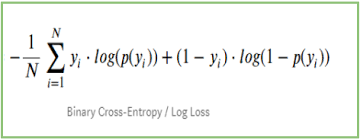

**Couple of helper functions**

In [29]:
def log_loss(y_true,y_pred): # these are just formal arrgumnets of function. They don't need to be declaired before hand
  epsilon = 1e-15
  y_pred_new = [max(i,epsilon) for i in y_pred]
  y_pred_new = [min(i,1-epsilon) for i in y_pred]
  y_pred_new = np.array(y_pred_new)
  return -np.mean(y_true*np.log(y_pred_new)+(1-y_true)*np.log(1-y_pred_new))

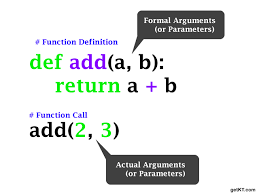

In [30]:
def sigmoid_numpy(X):
  return 1/(1+np.exp(-X))

In [31]:
sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [32]:
def gradient_descent(age,affordability,y_true,epochs): # GD function gives W's, bias.
  w1 = w2 = 1
  bias = 0
  L_rate = 0.5 # 0.1 is standard
  n=len(age)

  for i in range(epochs):
    weighted_sum = w1*age + w2*affordability + bias
    y_pred = sigmoid_numpy(weighted_sum)

    loss = log_loss(y_true,y_pred)

    w1d = (1/n)*np.dot(np.transpose(age),(y_pred - y_true))
    w2d = (1/n)*np.dot(np.transpose(affordability),(y_pred - y_true))
    bias_d = np.mean(y_pred-y_true)

    w1 = w1 - L_rate * w1d
    w2 = w2 - L_rate * w2d
    bias = bias - L_rate*bias_d

    print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')


  print("All the iterations have been done and final w1,w2,bais are respectively")
  return w1, w2, bias


In [33]:
gradient_descent(x_train['age'],x_train['affordibility'],y_train,1000) # epochs is trial and error, lets start with 1000

Epoch:0, w1:0.9795043839493173, w2:0.971113008870613, bias:-0.11343697095390247, loss:0.656690637613373
Epoch:1, w1:0.9642234592271505, w2:0.9500719303514418, bias:-0.21368950300396905, loss:0.6302554029841937
Epoch:2, w1:0.9536705186796195, w2:0.936209018884482, bias:-0.30202424092478486, loss:0.610208515435783
Epoch:3, w1:0.9473003189961419, w2:0.9287129546726973, bias:-0.3798333778559105, loss:0.5950512982852061
Epoch:4, w1:0.9445580150888709, w2:0.9267194592979467, bias:-0.44851648858273613, loss:0.58352041570037
Epoch:5, w1:0.9449140622946286, w2:0.9293797966704738, bias:-0.5093981536771807, loss:0.5746146745933546
Epoch:6, w1:0.9478852006138335, w2:0.9359048800118346, bias:-0.5636799010356393, loss:0.567576963040135
Epoch:7, w1:0.9530442808066526, w2:0.945588677481673, bias:-0.6124190648613789, loss:0.5618545699996517
Epoch:8, w1:0.9600223535599463, w2:0.9578166226793684, bias:-0.6565259584376333, loss:0.5570544141552725
Epoch:9, w1:0.9685060277922075, w2:0.9720644242527255, bias

(11.03739955973084, 3.3741647050073804, -6.725102732841611)

 it is clear that, weights, bias, losses; nothing are changing in last epochs. So we have converged very early. No need to run many epochs. So lets modify function a bit to terminate iterations when not much change take place

In [34]:
def gradient_descent(age,affordability,y_true,epochs,loss_thresold): # GD function gives W's, bias.
  w1 = w2 = 1
  bias = 0
  L_rate = 0.5 # 0.1 is standard
  n=len(age)

  for i in range(epochs):
    weighted_sum = w1*age + w2*affordability + bias
    y_pred = sigmoid_numpy(weighted_sum)

    loss = log_loss(y_true,y_pred)

    w1d = (1/n)*np.dot(np.transpose(age),(y_pred - y_true))
    w2d = (1/n)*np.dot(np.transpose(affordability),(y_pred - y_true))
    bias_d = np.mean(y_pred-y_true)

    w1 = w1 - L_rate * w1d
    w2 = w2 - L_rate * w2d
    bias = bias - L_rate*bias_d

    print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

    if loss <= loss_thresold:
      break

  print("All the iterations have been done and final w1,w2,bais are respectively")
  return w1, w2, bias

In [35]:
gradient_descent(x_train['age'],x_train['affordibility'],y_train,1000, 0.4631) # setted loss thresold jo built in use krne pr final aaya tha

Epoch:0, w1:0.9795043839493173, w2:0.971113008870613, bias:-0.11343697095390247, loss:0.656690637613373
Epoch:1, w1:0.9642234592271505, w2:0.9500719303514418, bias:-0.21368950300396905, loss:0.6302554029841937
Epoch:2, w1:0.9536705186796195, w2:0.936209018884482, bias:-0.30202424092478486, loss:0.610208515435783
Epoch:3, w1:0.9473003189961419, w2:0.9287129546726973, bias:-0.3798333778559105, loss:0.5950512982852061
Epoch:4, w1:0.9445580150888709, w2:0.9267194592979467, bias:-0.44851648858273613, loss:0.58352041570037
Epoch:5, w1:0.9449140622946286, w2:0.9293797966704738, bias:-0.5093981536771807, loss:0.5746146745933546
Epoch:6, w1:0.9478852006138335, w2:0.9359048800118346, bias:-0.5636799010356393, loss:0.567576963040135
Epoch:7, w1:0.9530442808066526, w2:0.945588677481673, bias:-0.6124190648613789, loss:0.5618545699996517
Epoch:8, w1:0.9600223535599463, w2:0.9578166226793684, bias:-0.6565259584376333, loss:0.5570544141552725
Epoch:9, w1:0.9685060277922075, w2:0.9720644242527255, bias

(1.6950871679099049, 1.7191612438448314, -1.667994858076114)

Almost same as tensorflow coeffs

gradient descent from scratch is done, now we will be building neural networks from scratch

**Purely python. No tensorflow or keras**

**All right now comes the time to implement our own custom neural network class !! yay !!**

In [39]:
class myNN:
  def __init__(self):
    self.w1 = 1
    self.w2 = 1
    self.bias = 0

  def fit(self, X, Y, epochs, loss_thresold):
    self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],Y, epochs,loss_thresold)
    print(f"Final Weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")

  def predict(self, x_test):
    weighted_sum = self.w1*x_test['age']+self.w2*x_test['affordibility']+self.bias
    return sigmoid_numpy(weighted_sum)

  def gradient_descent(self,age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
      weighted_sum = w1*age + w2*affordability +bias
      y_pred = sigmoid_numpy(weighted_sum)
      loss = log_loss(y_true, y_pred)

      w1d = (1/n)*np.dot(np.transpose(age),(y_pred-y_true))
      w2d = (1/n)*np.dot(np.transpose(age),(y_pred-y_true))

      bias_d = np.mean(y_pred - y_true)
      w1 = w1 - rate*w1d
      w2 = w2 - rate*w2d
      bias = bias - rate*bias_d

      if i%50 == 0: # only each 50th epoch will be printed
        print(f"Epoch:{i},w1:{w1},w2:{w2},bias:{bias},loss:{loss}")

      if loss<=loss_thresold: # also we want to print the last epoch.
        print(f"Epoch:{i},w1:{w1},w2:{w2},bias:{bias},loss:{loss}")
        break

    return w1, w2, bias

In [43]:
customModel = myNN() # customModel is an instance of our neural network
customModel.fit(x_train,y_train,epochs=8000,loss_thresold=0.3770)

Epoch:0,w1:0.9795043839493173,w2:0.9795043839493173,bias:-0.11343697095390247,loss:0.656690637613373
Epoch:50,w1:1.5974085065591301,w2:1.5974085065591301,bias:-1.5276810937044547,loss:0.473180937211537
Epoch:100,w1:2.3372918792441024,w2:2.3372918792441024,bias:-2.334040482998842,loss:0.41883569125782416
Epoch:150,w1:3.016487816659566,w2:3.016487816659566,bias:-3.097926913802244,loss:0.38916831681431324
Epoch:187,w1:3.492993998469528,w2:3.492993998469528,bias:-3.6500864030018794,loss:0.37689045770814383
Final Weights and bias: w1: 3.492993998469528, w2: 3.492993998469528, bias: -3.6500864030018794


In [44]:
x_test

,age,affordibility
19,0.18,1
16,0.25,0
11,0.28,1
27,0.46,1
25,0.54,1
17,0.58,1


Prediction using custom model

In [45]:
customModel.predict(x_test)

19    0.615773
16    0.058589
11    0.694437
27    0.809950
25    0.849300
17    0.866324
dtype: float64

(2) Predict using tensorflow model : suppose hota tb

model.predict(X_test_scaled)

array([

       [0.70548487],
       [0.058589 ],
       [0.66827849],
       [0.77801173],
       [0.7260697 ],
       [0.8294984 ]], dtype=float32)
Above you can compare predictions from our own custom model and tensoflow model. You will notice that predictions are almost same